# Initial housing_data EDA

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [2]:
df = pd.read_csv("../data/housing_data.csv", index_col="id")

## Exploring data

In [3]:
df.head()

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2669329904,324.0,5.0,3.0,4.0,340000.0,house,Sao Tome
2667338201,51.0,2.0,1.5,1.0,295000.0,NaN,Santa Teresa
2643720430,94.0,3.0,4.0,2.0,629000.0,apartment,Cidade Jardim
2681509397,66.0,2.0,2.0,2.0,460000.0,apartment,Imbuí
2671493238,82.0,3.0,3.0,2.0,649990.0,apartment,Piatã


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2744 entries, 2669329904 to 2648775965
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   areas         2744 non-null   float64
 1   bedrooms      2733 non-null   float64
 2   bathrooms     2736 non-null   float64
 3   parkingSpots  2196 non-null   float64
 4   prices        2739 non-null   float64
 5   type          2719 non-null   object 
 6   neighborhood  2744 non-null   object 
dtypes: float64(5), object(2)
memory usage: 171.5+ KB


Areas are set in m² and Prices are in BRL.

In [5]:
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,2744.000000,2733.000000,2736.000000,2196.000000,2.739000e+03
mean,126.000000,2.420966,1.678363,1.385246,2.084453e+05
std,1252.896791,1.131123,0.893294,1.578339,1.330072e+06
min,23.000000,1.000000,1.000000,1.000000,1.500000e+04
25%,67.000000,2.000000,1.000000,1.000000,5.800000e+04
50%,80.000000,2.000000,2.000000,1.000000,8.000000e+04
75%,92.000000,3.000000,2.000000,2.000000,1.400000e+05
max,60000.000000,50.000000,18.000000,50.000000,5.928620e+07


In [6]:
df[df.areas > 2000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto
2663191661,60000.0,2.0,1.0,1.0,65000.0,house,São Marcos
2682226401,5403.0,NaN,NaN,NaN,25000000.0,NaN,BA
2518494985,2500.0,50.0,12.0,20.0,9000000.0,NaN,Armação
2473021950,7500.0,NaN,NaN,NaN,18000000.0,NaN,BA
2656624394,10821.0,NaN,NaN,NaN,2200000.0,NaN,Cassange


Areas > 2000 Will be removed since they might not be House/Apartment or might be bad input.

In [7]:
df[df.prices > 10000000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto
2682226401,5403.0,NaN,NaN,NaN,25000000.0,NaN,BA
2682843782,66.0,2.0,2.0,1.0,59286200.0,apartment,Piatã
2473021950,7500.0,NaN,NaN,NaN,18000000.0,NaN,BA


For now, we'll drop immensely high prices

We'll drop any rows without price too

In [8]:
df = df[~(df.prices.isna())]
df = df[~(df.prices > 10000000)]
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,2735.000000,2728.000000,2731.000000,2191.000000,2.735000e+03
mean,113.281353,2.421921,1.678140,1.385212,1.667807e+05
std,1165.666010,1.131583,0.893523,1.579966,3.122718e+05
min,23.000000,1.000000,1.000000,1.000000,1.500000e+04
25%,67.000000,2.000000,1.000000,1.000000,5.800000e+04
50%,80.000000,2.000000,2.000000,1.000000,8.000000e+04
75%,91.500000,3.000000,2.000000,2.000000,1.400000e+05
max,60000.000000,50.000000,18.000000,50.000000,9.000000e+06


### Numerical columns

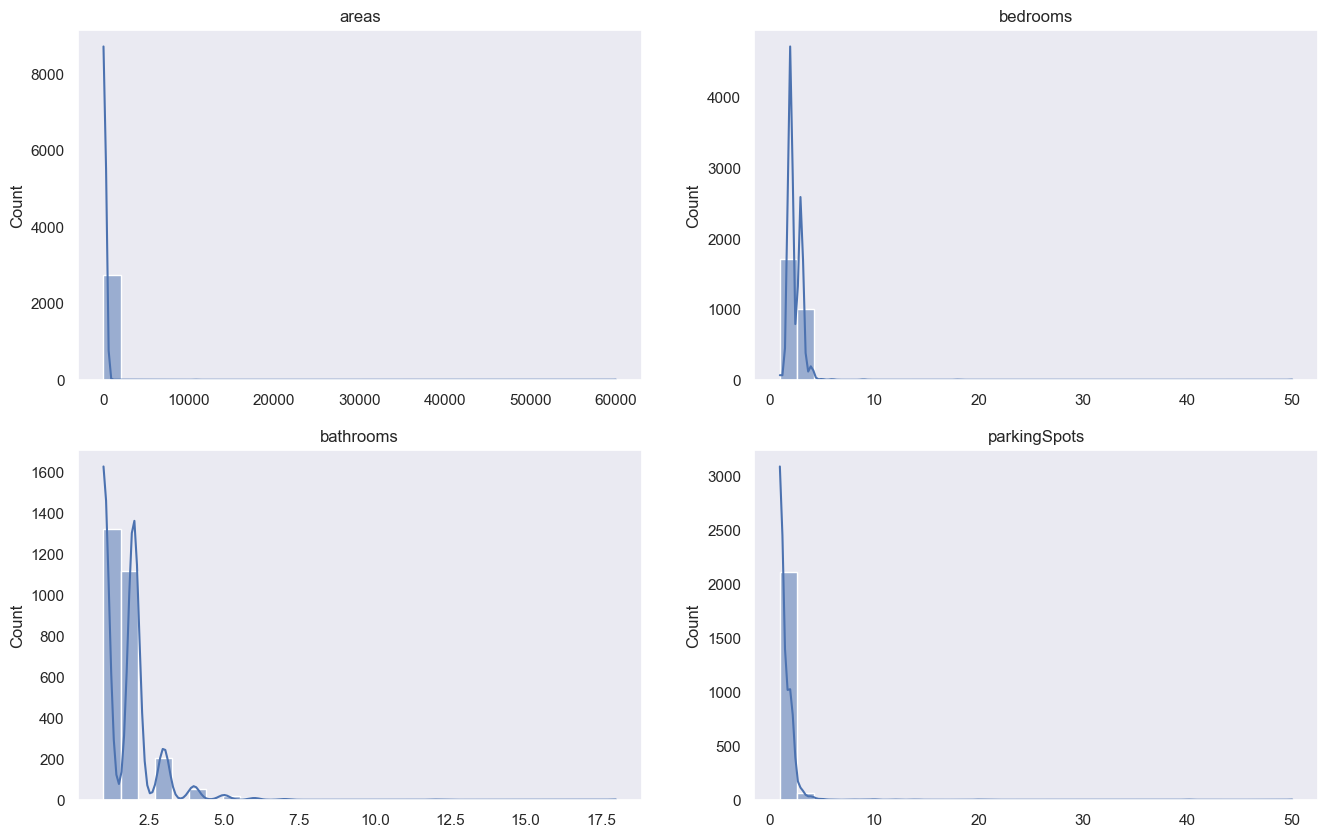

In [9]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

For now, we'll drop values far from the central tendency arbitrarily

In [10]:
df = df[~(df.areas > 200)]
df = df[~(df.bedrooms > 5)]
df = df[~(df.bathrooms > 5)]
df = df[~(df.parkingSpots > 5)]

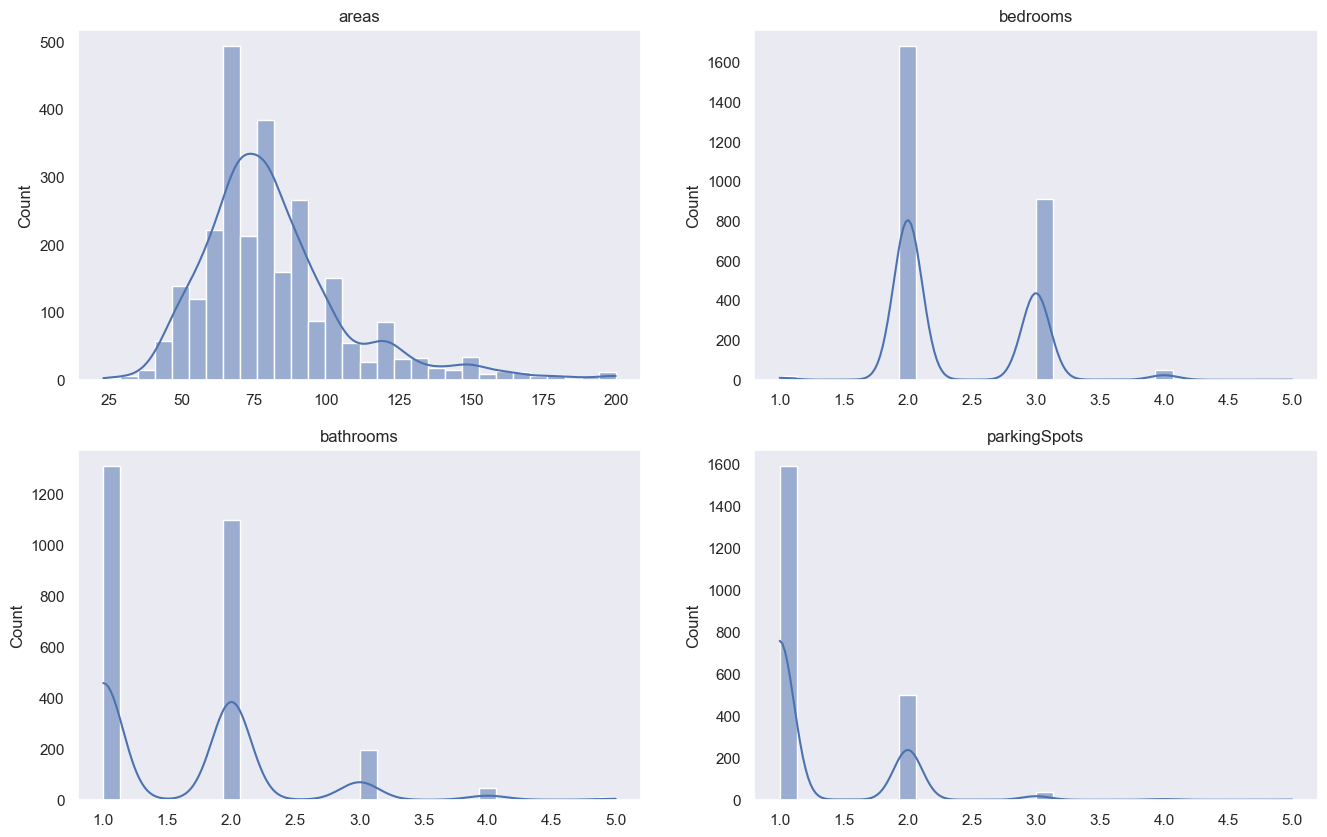

In [11]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

There where a few registers in the discrete columns (i.e. bathrooms, parkingSpots and bedrooms) that where labeled "x-y" (e.g. "2-4" bedrooms),
 so when processing the scraped data, we took the mean of these values.

### Prices

Text(0.5, 1.0, 'Housings under R$ 700,000')

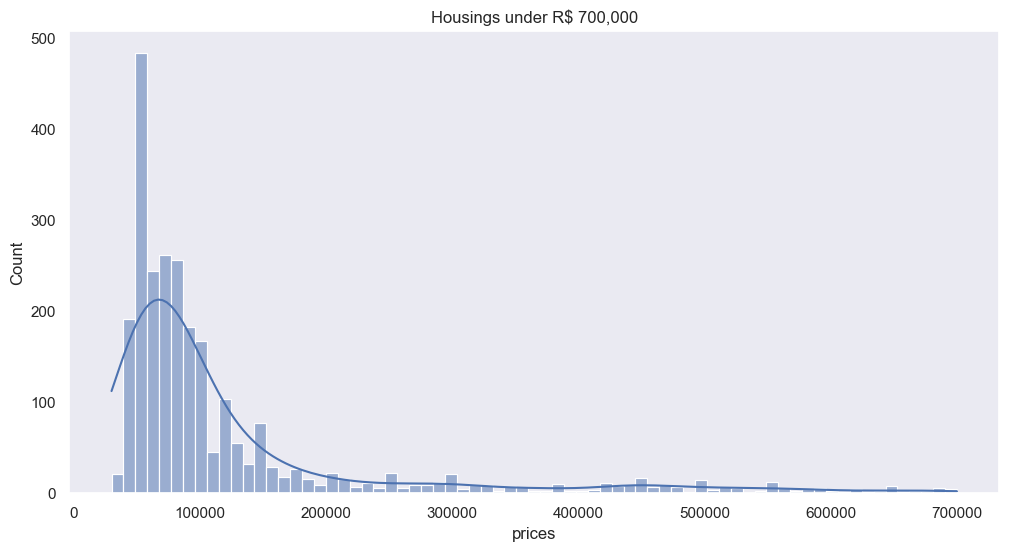

In [12]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices < 700000].prices, kde=True).set_title("Housings under R$ 700,000")

Text(0.5, 1.0, 'Housings over R$ 700,000')

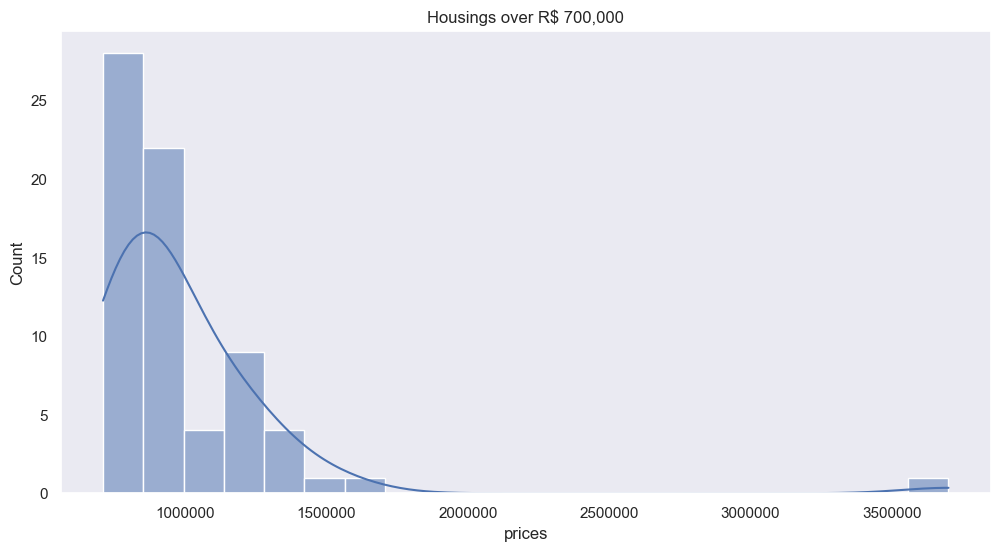

In [13]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices > 700000].prices, kde=True).set_title("Housings over R$ 700,000")

### Categorical Columns

In [14]:
df.neighborhood.value_counts()

neighborhood
Ribeira                                          123
Itapuã                                           117
Paripe                                            79
Pernambués                                        70
Boca do Rio                                       68
Castelo Branco                                    58
Liberdade                                         53
Sao Caetano                                       49
Cabula VI                                         44
Pituba                                            44
Imbuí                                             42
Plataforma                                        40
Iapi                                              39
Brotas                                            39
Pituaçu                                           37
Engenho Velho de Brotas                           37
Lobato                                            36
BA                                                34
Dom Avelar                       

'BA' seems to be a parsing error due to lack of neighborhood on the raw data (BA stands for Bahia, which is the state, not the neighborhood). We'll set that as NaN.

In [15]:
df.neighborhood = df.neighborhood.apply(lambda x: np.nan if x == "BA" else x)

<Axes: xlabel='type', ylabel='count'>

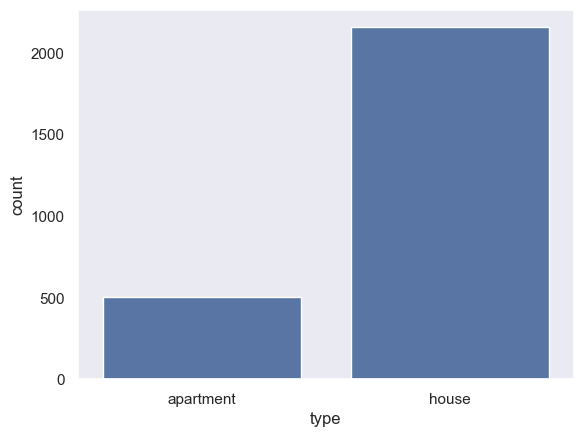

In [16]:
sns.countplot(x=df.type)

### Houses vs Apartments

In [17]:
df[df.type == "apartment"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,502.000000,502.000000,502.000000,448.000000,5.020000e+02
mean,77.819721,2.437251,2.159363,1.472098,4.290619e+05
std,26.814936,0.635405,0.960550,0.571315,3.151731e+05
min,29.000000,1.000000,1.000000,1.000000,2.999900e+04
25%,60.000000,2.000000,1.000000,1.000000,2.012500e+05
50%,72.000000,2.000000,2.000000,1.000000,3.800000e+05
75%,85.000000,3.000000,3.000000,2.000000,5.600000e+05
max,200.000000,4.000000,5.000000,4.000000,3.700000e+06


In [18]:
df[df.type == "house"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,2158.000000,2158.000000,2158.000000,1684.000000,2158.000000
mean,83.090825,2.358202,1.508804,1.230998,85113.934198
std,25.552170,0.509579,0.610271,0.489426,54627.147801
min,23.000000,1.000000,1.000000,1.000000,30000.000000
25%,68.000000,2.000000,1.000000,1.000000,50000.000000
50%,80.000000,2.000000,1.000000,1.000000,70000.000000
75%,90.000000,3.000000,2.000000,1.000000,100000.000000
max,200.000000,5.000000,5.000000,5.000000,770000.000000


### Prices vs Areas

<Axes: xlabel='areas', ylabel='prices'>

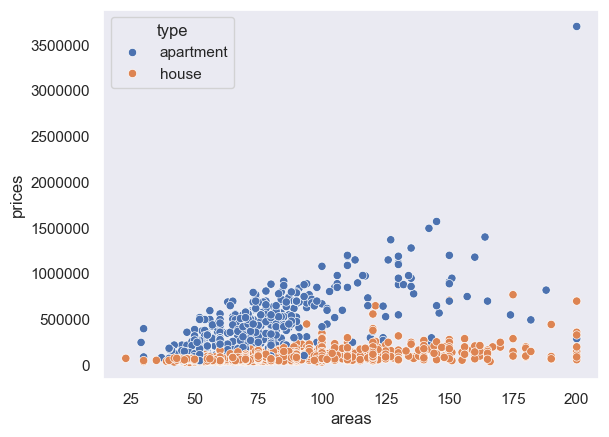

In [19]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x=df.areas, y=df.prices, hue=df.type)

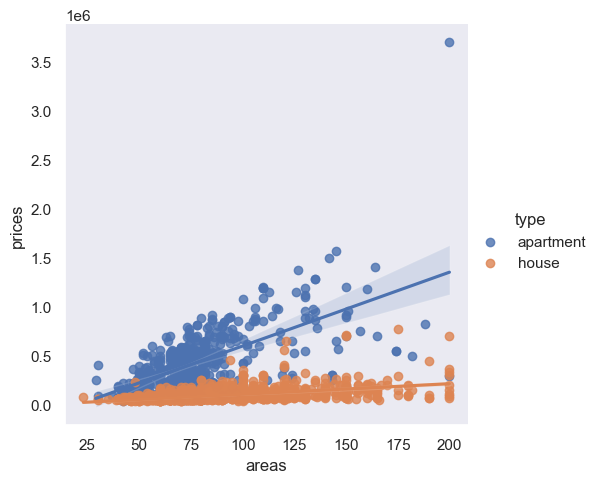

In [20]:
sns.lmplot(data=df, x="areas", y="prices", hue="type")

Apartments' price/area relationship is way more steep than houses'.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Houses)')]

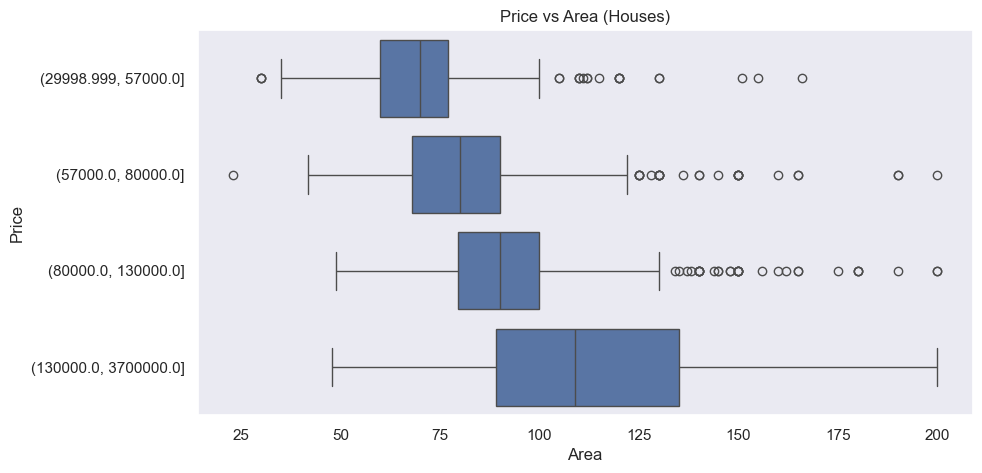

In [21]:
df1 = df.copy()
df1['prices_bins'] = pd.qcut(df.prices, q=[0, .25, .5, .75, 1], duplicates='drop')

plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "house"].areas, y=df1[df1.type == "house"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Houses)")

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Apartments)')]

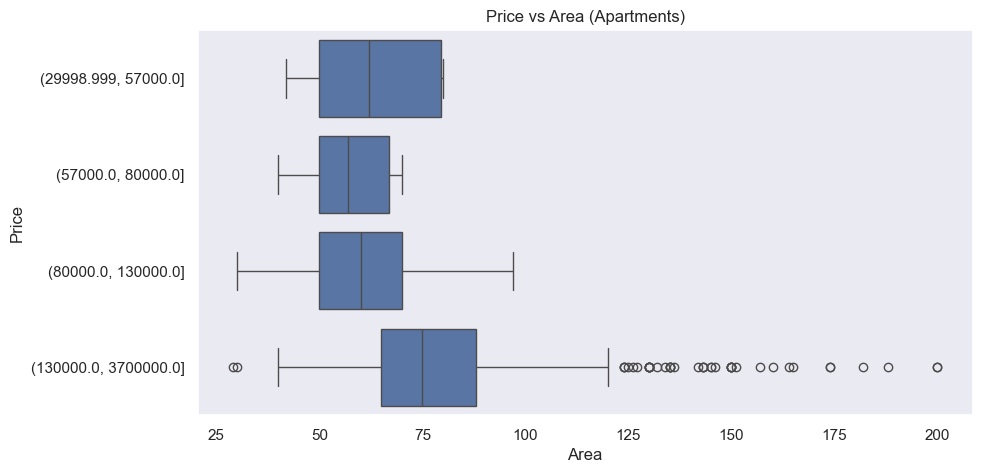

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "apartment"].areas, y=df1[df1.type == "apartment"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Apartments)")

The odd distribution here might be due to lack of apartment data.

### Prices vs Other Features

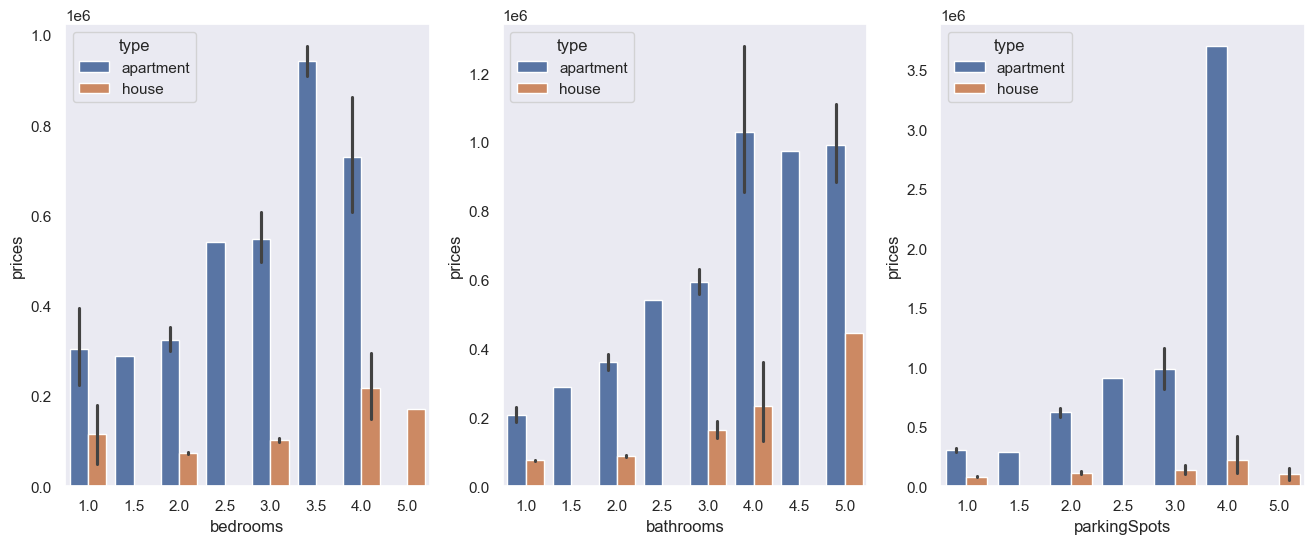

In [23]:
categories = ["bedrooms", "bathrooms", "parkingSpots"]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i in range(3):
    sns.barplot(x=df[categories[i]], y=df.prices, hue=df.type, ax=ax[i])